In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizing the image data to range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshaping the data to fit the model input requirements
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converting the labels into one-hot vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Desighning The CNN  Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Designing the convolutional neural network (CNN) model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling the model with appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train your model on the training data
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Validate your model using the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/10
422/422 [==============================] - 40s 94ms/step - loss: 0.6022 - accuracy: 0.7848 - val_loss: 0.4057 - val_accuracy: 0.8560
Epoch 2/10
422/422 [==============================] - 40s 95ms/step - loss: 0.3805 - accuracy: 0.8633 - val_loss: 0.3582 - val_accuracy: 0.8698
Epoch 3/10
422/422 [==============================] - 41s 97ms/step - loss: 0.3263 - accuracy: 0.8809 - val_loss: 0.3191 - val_accuracy: 0.8872
Epoch 4/10
422/422 [==============================] - 40s 94ms/step - loss: 0.2944 - accuracy: 0.8929 - val_loss: 0.2926 - val_accuracy: 0.8953
Epoch 5/10
422/422 [==============================] - 40s 94ms/step - loss: 0.2774 - accuracy: 0.8990 - val_loss: 0.2975 - val_accuracy: 0.8897
Epoch 6/10
422/422 [==============================] - 41s 97ms/step - loss: 0.2581 - accuracy: 0.9070 - val_loss: 0.2925 - val_accuracy: 0.8938
Epoch 7/10
422/422 [==============================] - 40s 94ms/step - loss: 0.2415 - accuracy: 0.9130 - val_loss: 0.2818 - val_accuracy:

**Evaluation and analysis of the model**

313/313 [==============================] - 3s 8ms/step - loss: 0.2534 - accuracy: 0.9099
Test Loss: 0.253351092338562
Test Accuracy: 0.9099000096321106


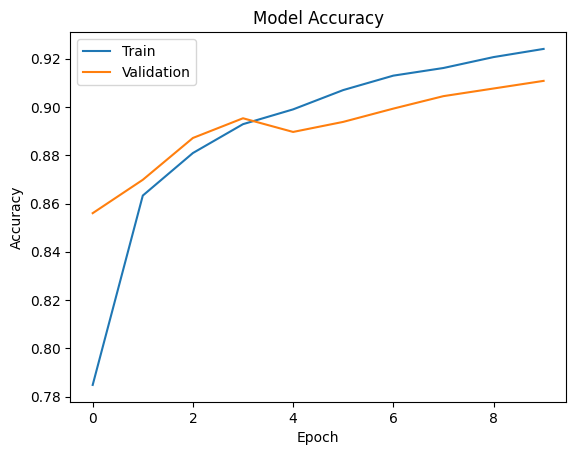

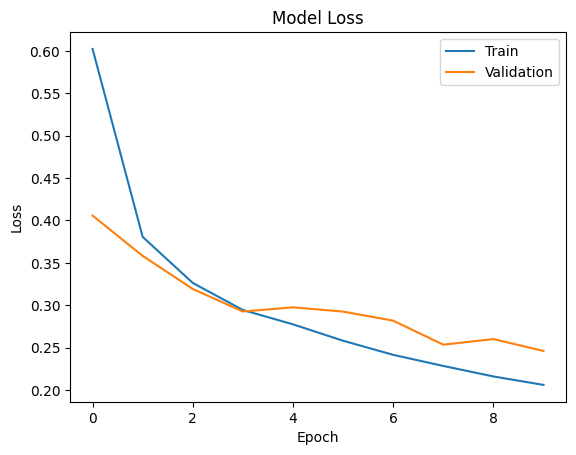

1/1 [==============================] - 0s 23ms/step


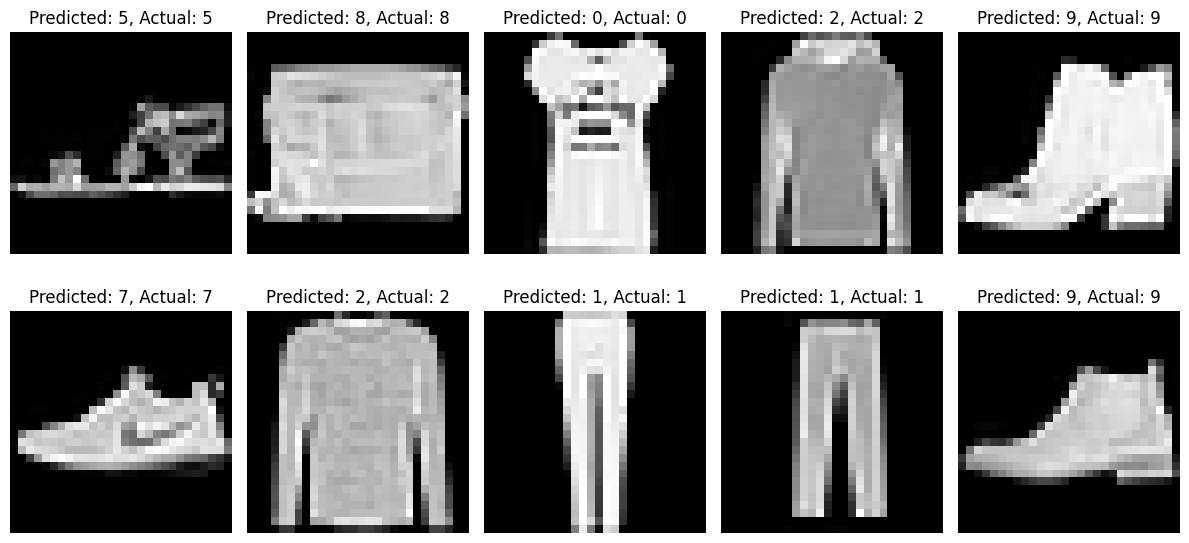

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model's performance on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Display sample images with their predicted and actual labels
num_samples = 10
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(sample_labels, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()